In [9]:
# K-Nearest Neighbors
# find nearest neighbors for each point in a set 

import numpy as np 
rng = np.random.default_rng(seed = 42)

In [10]:
X = rng.random((10,2))
X # first column is an X, second is an Y and the 10 points at all 

array([[0.77395605, 0.43887844],
       [0.85859792, 0.69736803],
       [0.09417735, 0.97562235],
       [0.7611397 , 0.78606431],
       [0.12811363, 0.45038594],
       [0.37079802, 0.92676499],
       [0.64386512, 0.82276161],
       [0.4434142 , 0.22723872],
       [0.55458479, 0.06381726],
       [0.82763117, 0.6316644 ]])

/tmp/ipykernel_232677/4120168483.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


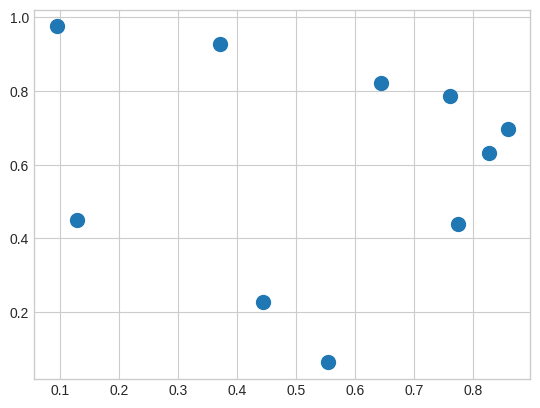

In [11]:
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.style.use("seaborn-whitegrid")
plt.scatter(X[:,0], X[:,1], s=100);

In [12]:
# compute the distance between each pair of points
# 1) square distane between two points is the sum of the squared differeces in each 
# dimension, using the efficient broadcasting
# 2) and aggregation routines 

# so we can provide single line of code:
# one axis - is the first line of points, second is the second line of points 
# and we calculate matrix of the distances 
# notice when we have 0 - is the point itself

dist_sq = np.sum(( X[:,np.newaxis] - X[np.newaxis,:]) ** 2, axis=-1)
dist_sq 


array([[0.        , 0.07398111, 0.75019311, 0.12070228, 0.41724485,
        0.40056968, 0.16428994, 0.15404928, 0.18879464, 0.04004745],
       [0.07398111, 0.        , 0.66176428, 0.01736513, 0.59460745,
        0.2905717 , 0.06183373, 0.39339909, 0.49381057, 0.00527591],
       [0.75019311, 0.66176428, 0.        , 0.48077103, 0.27702496,
        0.07890604, 0.32552305, 0.68204444, 1.04336354, 0.65626159],
       [0.12070228, 0.01736513, 0.48077103, 0.        , 0.51340197,
        0.17216331, 0.01510002, 0.41323553, 0.56430573, 0.02826045],
       [0.41724485, 0.59460745, 0.27702496, 0.51340197, 0.        ,
        0.28583271, 0.40466324, 0.14920913, 0.33131299, 0.52218667],
       [0.40056968, 0.2905717 , 0.07890604, 0.17216331, 0.28583271,
        0.        , 0.08538234, 0.49461011, 0.77845636, 0.29578088],
       [0.16428994, 0.06183373, 0.32552305, 0.01510002, 0.40466324,
        0.08538234, 0.        , 0.39482809, 0.58396752, 0.07028811],
       [0.15404928, 0.39339909, 0.6820444

In [13]:
# similar in the different set of operations:

# for each pair of points, compute differences in their coordinates
differences = X[:,np.newaxis] - X[np.newaxis, :]    # lineup points 
differences.shape 

(10, 10, 2)

In [19]:
# square the coordinate differences
sq_differences = differences ** 2 
sq_differences.shape 
sq_differences

array([[[0.00000000e+00, 0.00000000e+00],
        [7.16424639e-03, 6.68168678e-02],
        [4.62099082e-01, 2.88094027e-01],
        [1.64258739e-04, 1.20538025e-01],
        [4.17112426e-01, 1.32422514e-04],
        [1.62536393e-01, 2.38033285e-01],
        [1.69236497e-02, 1.47366291e-01],
        [1.09257914e-01, 4.47913702e-02],
        [4.81237504e-02, 1.40670891e-01],
        [2.88101888e-03, 3.71664261e-02]],

       [[7.16424639e-03, 6.68168678e-02],
        [0.00000000e+00, 0.00000000e+00],
        [5.84338811e-01, 7.74254680e-02],
        [9.49810424e-03, 7.86702941e-03],
        [5.33607294e-01, 6.10001534e-02],
        [2.37948738e-01, 5.26229652e-02],
        [4.61101753e-02, 1.57235510e-02],
        [1.72377522e-01, 2.21021566e-01],
        [9.24239850e-02, 4.01386582e-01],
        [9.58939477e-04, 4.31696699e-03]],

       [[4.62099082e-01, 2.88094027e-01],
        [5.84338811e-01, 7.74254680e-02],
        [0.00000000e+00, 0.00000000e+00],
        [4.44838782e-01, 3.593

In [18]:
# sum the coordinate differences to get the square distance 
dist_sq = sq_differences.sum(-1)
dist_sq.shape 
dist_sq 

array([[0.        , 0.07398111, 0.75019311, 0.12070228, 0.41724485,
        0.40056968, 0.16428994, 0.15404928, 0.18879464, 0.04004745],
       [0.07398111, 0.        , 0.66176428, 0.01736513, 0.59460745,
        0.2905717 , 0.06183373, 0.39339909, 0.49381057, 0.00527591],
       [0.75019311, 0.66176428, 0.        , 0.48077103, 0.27702496,
        0.07890604, 0.32552305, 0.68204444, 1.04336354, 0.65626159],
       [0.12070228, 0.01736513, 0.48077103, 0.        , 0.51340197,
        0.17216331, 0.01510002, 0.41323553, 0.56430573, 0.02826045],
       [0.41724485, 0.59460745, 0.27702496, 0.51340197, 0.        ,
        0.28583271, 0.40466324, 0.14920913, 0.33131299, 0.52218667],
       [0.40056968, 0.2905717 , 0.07890604, 0.17216331, 0.28583271,
        0.        , 0.08538234, 0.49461011, 0.77845636, 0.29578088],
       [0.16428994, 0.06183373, 0.32552305, 0.01510002, 0.40466324,
        0.08538234, 0.        , 0.39482809, 0.58396752, 0.07028811],
       [0.15404928, 0.39339909, 0.6820444

In [20]:
# check the logic (the set of distances between each point and itself must be 0):
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
# with the pairwise square distances converted, we can now use np.argsort 
# to sort along each row
# the leftmost columns will then give the indices of of the nearest neighbors:
nearest = np.argsort(dist_sq, axis=1)
nearest 

# notice first column 0-9 (each point is nearest to itself)

array([[0, 9, 1, 3, 7, 6, 8, 5, 4, 2],
       [1, 9, 3, 6, 0, 5, 7, 8, 4, 2],
       [2, 5, 4, 6, 3, 9, 1, 7, 0, 8],
       [3, 6, 1, 9, 0, 5, 7, 2, 4, 8],
       [4, 7, 2, 5, 8, 6, 0, 3, 9, 1],
       [5, 2, 6, 3, 4, 1, 9, 0, 7, 8],
       [6, 3, 1, 9, 5, 0, 2, 7, 4, 8],
       [7, 8, 4, 0, 9, 1, 6, 3, 5, 2],
       [8, 7, 0, 4, 9, 1, 3, 6, 5, 2],
       [9, 1, 3, 0, 6, 5, 7, 8, 4, 2]])

In [22]:
# we do full sort here, if we interested in just nearest points 
# we can use partitioning (all columns after second is the next points by the 
# distance - we don't need them):
K = 2 
nearest_partition = np.argpartition(dist_sq, K+1, axis=1)
nearest_partition

# notice that only first two columns can be in use 


array([[0, 9, 1, 3, 7, 5, 6, 8, 4, 2],
       [1, 9, 3, 6, 0, 5, 2, 7, 8, 4],
       [2, 5, 4, 6, 3, 9, 1, 7, 8, 0],
       [6, 3, 1, 9, 0, 5, 2, 7, 8, 4],
       [7, 2, 4, 5, 8, 6, 0, 1, 3, 9],
       [5, 2, 6, 3, 1, 4, 9, 7, 8, 0],
       [3, 6, 1, 9, 5, 0, 2, 7, 8, 4],
       [7, 4, 8, 0, 1, 5, 6, 3, 2, 9],
       [7, 0, 8, 4, 1, 5, 6, 3, 2, 9],
       [3, 9, 1, 0, 2, 5, 6, 7, 8, 4]])

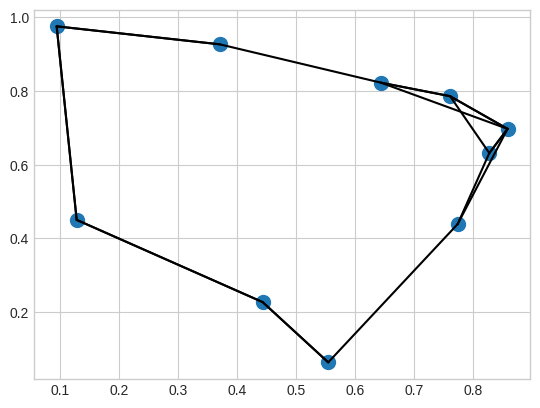

In [23]:
# draw a connection between each neighbors:
plt.scatter(X[:,0],X[:,1],s=100)
K=2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j],X[i]), color='black');